## Getting a Set of Vectors of all the images

In [1]:
import os
import cv2
import numpy as np

# Read in the images
# Path to the Faces folder
folder_path = "Faces/Train"

# Get the list of image file names in the folder
training_image_files = os.listdir(folder_path)
training_image_files = [file for file in training_image_files if file.endswith('.jpg')]
training_image_files.sort()
# Initialize an empty list to store the column vectors
column_vectors = []

# Iterate over each image file
for file_name in training_image_files:
    # Read the image
    image_path = os.path.join(folder_path, file_name)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Convert the image to a column vector
    column_vector = np.reshape(image, (-1, 1))
    # Append the column vector to the list
    column_vectors.append(column_vector)

# Create the matrix of column vectors
training_matrix = np.hstack(column_vectors)
print(training_matrix.shape)
width = 160
height = 160

(25600, 61)


### Plotting an example point

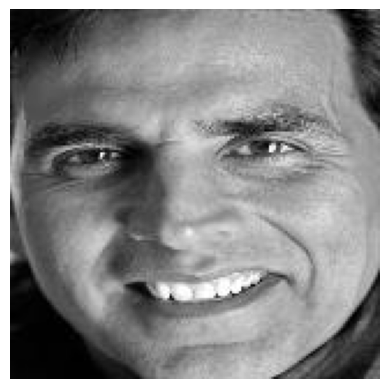

In [2]:
import matplotlib.pyplot as plt

# Get the first column vector from the matrix
first_column_vector = training_matrix[:, 1]

# Reshape the column vector to match the original image shape
image_shape = (height, width)
reshaped_image = np.reshape(first_column_vector, image_shape)

# Display the image using matplotlib
plt.imshow(reshaped_image, cmap='gray')
plt.axis('off')
plt.show()

### Concatenating all the rows of matrix into a column vector of size (NxN)x1

In [3]:
column_vector = training_matrix.flatten()
print(column_vector.shape)

(1561600,)


### Get the mean image

In [4]:
mean_face = np.mean(training_matrix, axis=1)

### Plot the average image

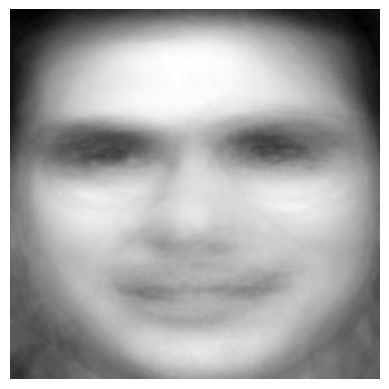

In [5]:
# Reshape the column vector to match the original image shape
image_shape = (height, width)
reshaped_image = np.reshape(mean_face, image_shape)

# Display the image using matplotlib
plt.imshow(reshaped_image, cmap='gray')
plt.axis('off')
plt.show()

### Subtract the mean image from all the images

In [6]:
normalized_images = np.ndarray(shape=training_matrix.shape)
for i in range(training_matrix.shape[1]):
    normalized_images[:,i] = np.subtract(training_matrix[:, i], mean_face)
print(normalized_images.shape)

(25600, 61)


### Plot an example mean subtracted image

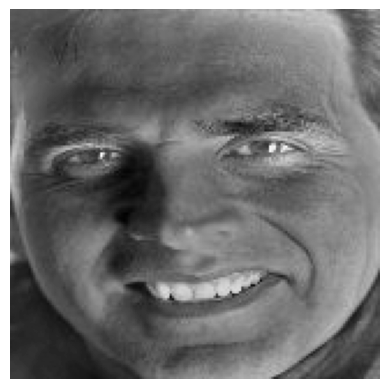

In [7]:
# Get the first column vector from the matrix
first_column_vector = normalized_images[:, 1]

# Reshape the column vector to match the original image shape
image_shape = (height, width)
reshaped_image = np.reshape(first_column_vector, image_shape)

# Display the image using matplotlib
plt.imshow(reshaped_image, cmap='gray')
plt.axis('off')
plt.show()

### Construct a Covariance Matrix

In [8]:
# cov_matrix = np.cov(normalized_images)
# cov_matrix = np.divide(cov_matrix, matrix.shape[1])
# print(cov_matrix.shape)

A = training_matrix
A_T = np.transpose(training_matrix)
print(A.shape)
print(A_T.shape)
cov_matrix = np.dot(A, A_T)
print(cov_matrix.shape)

(25600, 61)
(61, 25600)
(25600, 25600)


### Eigen Vectors of Covariance Matrix
Finding the Eigen vectors of covariance matrix is not feasible because of its size.
#### A simple mathematical trick would work.
Let our matrix of images be A. Then:<br>
L = Transpose_of_A x A              ==> Shape is: MxM where M is the count of images (count of columns of the matrix A)<br>
Eigen Decompose matrix L


In [9]:
L = np.dot(A_T, A)
eigenvalues, vs = np.linalg.eig(L)
# Find A * vs
eigen_vectors = np.dot(A, vs)
print(eigen_vectors.shape)

(25600, 61)


### Plot an example eigenface

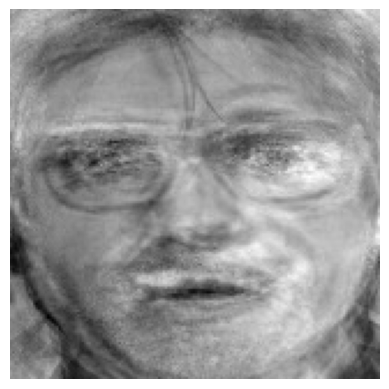

In [10]:
# Get the first column vector from the matrix
first_column_vector = eigen_vectors[:, 1]

# Reshape the column vector to match the original image shape
image_shape = (height, width)
reshaped_image = np.reshape(first_column_vector, image_shape)

# Display the image using matplotlib
plt.imshow(reshaped_image, cmap='gray')
plt.axis('off')
plt.show()

## Testing

In [11]:
# loading a test image
testing_folder_path = 'Faces/Test'
# Get the list of image file names in the folder
testing_image_files = os.listdir(testing_folder_path)
# Initialize an empty list to store the column vectors
column_vectors = []
# Remove files that do not end with .jpg
testing_image_files = [file for file in testing_image_files if file.endswith('.jpg')]
testing_image_files.sort()
# Iterate over each image file
for file_name in testing_image_files:
    # Read the image
    image_path = os.path.join(testing_folder_path, file_name)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Convert the image to a column vector
    column_vector = np.reshape(image, (-1, 1))
    # Append the column vector to the list
    column_vectors.append(column_vector)

# Create the matrix of column vectors
testing_matrix = np.hstack(column_vectors)
print(testing_matrix.shape)

(25600, 10)


### Plotting a testing image

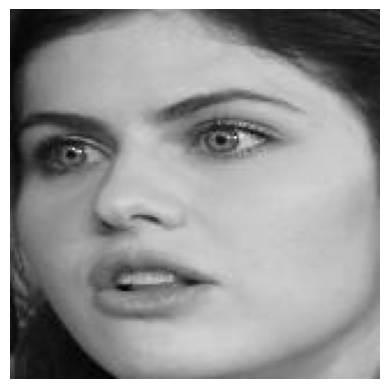

In [12]:
# Get the first column vector from the matrix
first_column_vector = testing_matrix[:, 1]

# Reshape the column vector to match the original image shape
image_shape = (height, width)
reshaped_image = np.reshape(first_column_vector, image_shape)

# Display the image using matplotlib
plt.imshow(reshaped_image, cmap='gray')
plt.axis('off')
plt.show()

### Face Recognition
Transforming testing face images to the eigenface components 

In [13]:
U_T = np.transpose(eigen_vectors)
normalized_testing_images = np.ndarray(shape=testing_matrix.shape)
for i in range(testing_matrix.shape[1]):
    normalized_testing_images[:,i] = np.subtract(testing_matrix[:, i], mean_face)
print(normalized_testing_images.shape)

omega_test = np.dot(U_T, normalized_testing_images)
print(omega_test.shape)

omega_train = np.dot(U_T, normalized_images)
print(omega_train.shape)

(25600, 10)
(61, 10)
(61, 61)


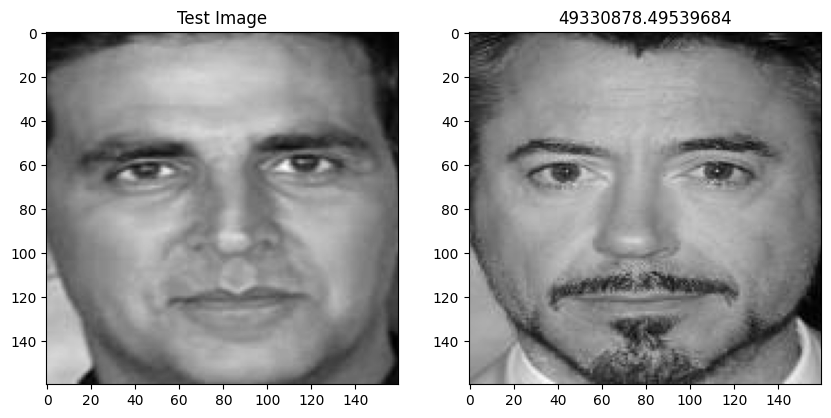

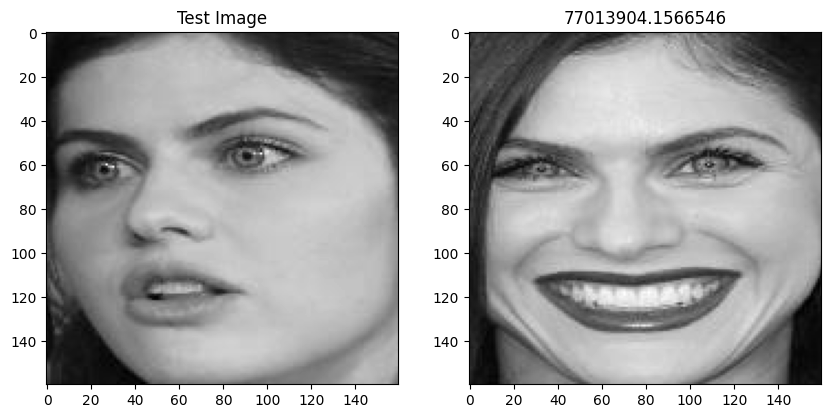

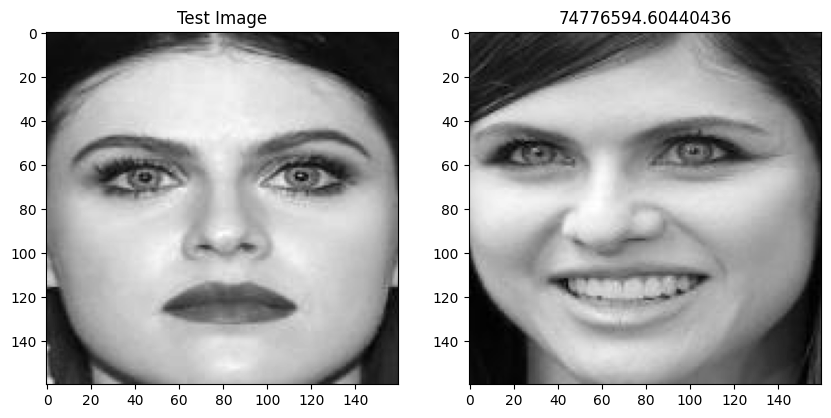

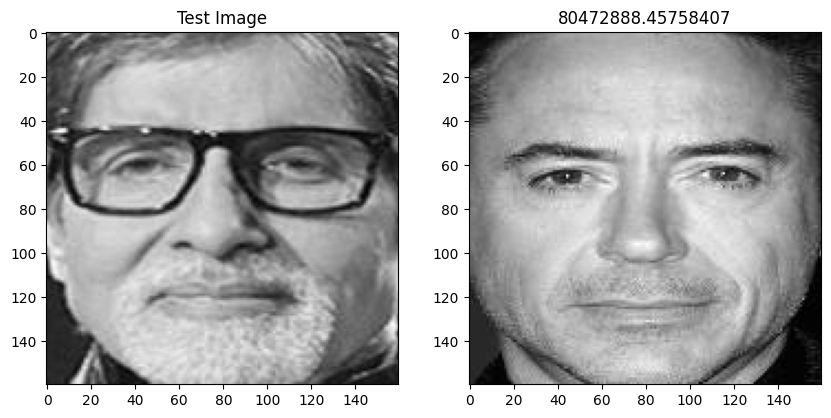

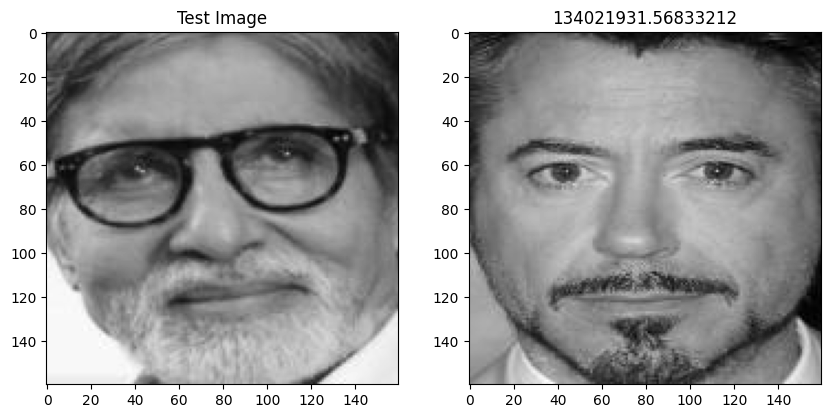

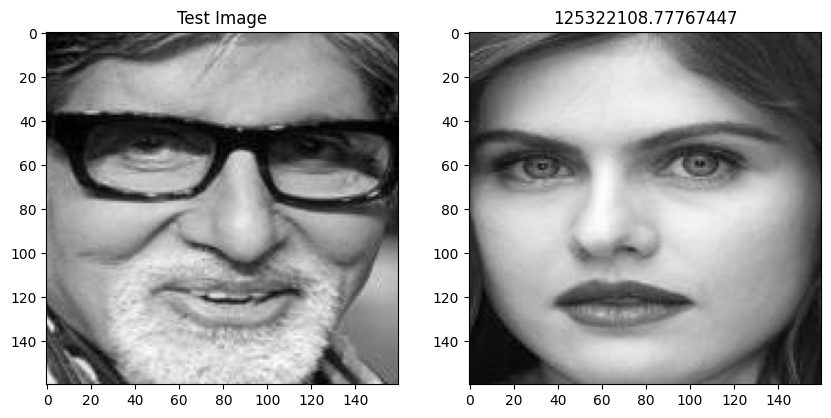

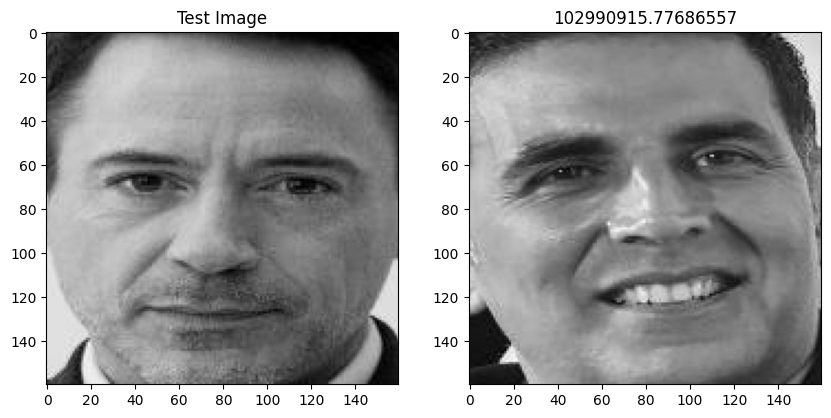

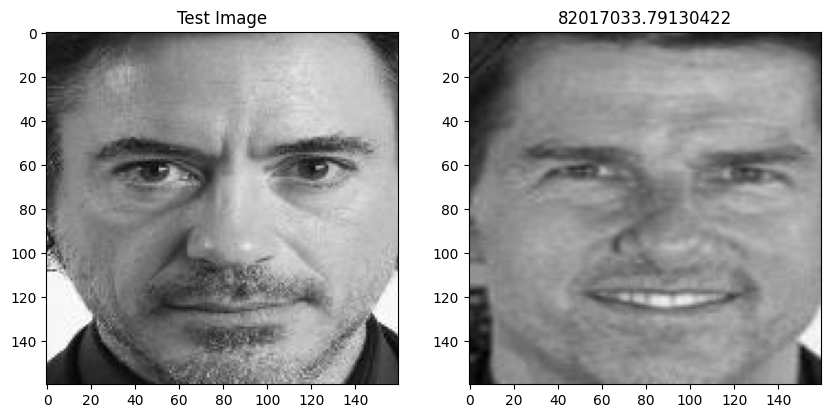

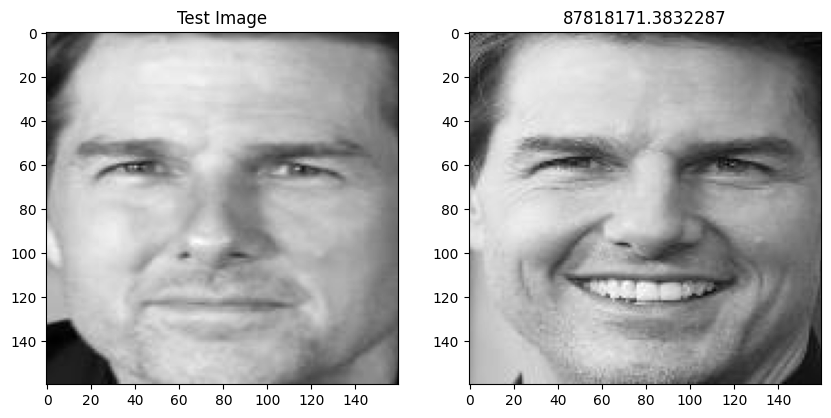

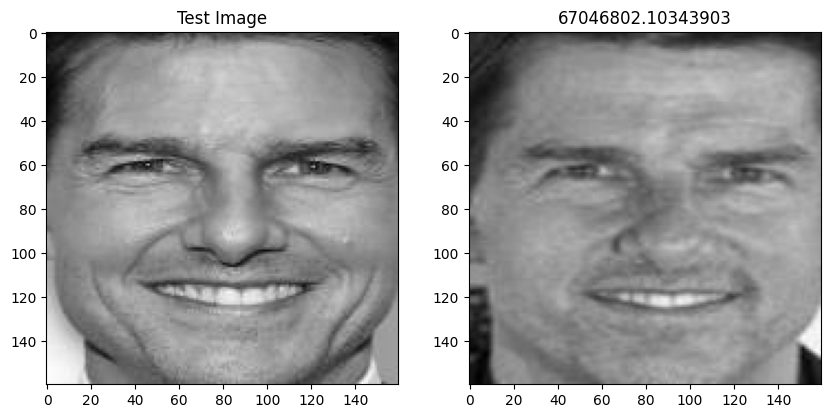

In [17]:
## For each testing image find ε_i as ε = argmin ||Ω - Ω_i||
# For each column of omega_test
for i in range(omega_test.shape[1]):
    # For each column of omega_train
    epsilon_rec = 1e9
    image_idx = -1
    for j in range(omega_train.shape[1]):
        epsilon = np.linalg.norm(omega_test[:, i] - omega_train[:, j])
        if epsilon < epsilon_rec:
            epsilon_rec = epsilon
            image_idx = j

    # Plot the i-th testing image file along side the recognized image using the index
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    # Get the i-th column and reshape it to plot
    image = testing_matrix[:, i]
    reshaped_image = np.reshape(image, image_shape)
    ax[0].imshow(reshaped_image, cmap='gray')
    ax[0].set_title('Test Image')

    # Plot the recognized image
    recognized_image = training_matrix[:, image_idx]
    reshaped_recognized_image = np.reshape(recognized_image, image_shape)
    ax[1].imshow(reshaped_recognized_image, cmap='gray')
    ax[1].set_title(str(epsilon_rec))

    plt.show()
    